<a href="https://colab.research.google.com/github/Nikila-K/Assignments/blob/main/Nikila_Assignment_Model_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Load the dataset into python environment

In [ ]:
#Loading the dataset

In [2]:
from google.colab import files
files.upload()

Saving titanic_dataset.csv to titanic_dataset.csv


{'titanic_dataset.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55

In [3]:
data=pd.read_csv('titanic_dataset.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.shape

(891, 12)

In [7]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


2. Do all the necessary pre-processing steps

In [ ]:
#checking for the null values

In [10]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Columns 'Age','Embarked' and 'Cabin' contain null values.

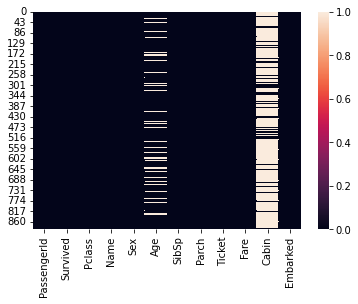

In [11]:
sns.heatmap(data.isnull())

In [ ]:
#checking for the percentage of null values

In [12]:
data.isnull().sum()*100/len(data)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Cabin column contains 77.104% of null values.Hence dropping the column 'Cabin'.

In [13]:
data.drop('Cabin', axis=1, inplace = True)

In [ ]:
#Histogram of Age column

<function matplotlib.pyplot.show(*args, **kw)>

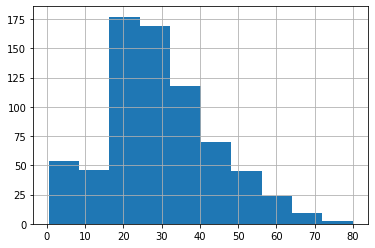

In [15]:
data['Age'].hist()
plt.show

In [ ]:
#Filling the missing values

In [ ]:
#Age cloumn is rightly skewed.Hence using the median value to fill the null values.

In [16]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [17]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
#Embarked being a categorical column, missing values are filled with mode value

In [18]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [19]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
data[['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Fare','Ticket','Embarked']].nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Fare           248
Ticket         681
Embarked         3
dtype: int64

In [ ]:
#'PassengerId','Name' and 'Ticket'contain unique values.Hence dropping those columns

In [21]:
data1=data.drop(['PassengerId','Name','Ticket'],axis=1)

In [22]:
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#correlation

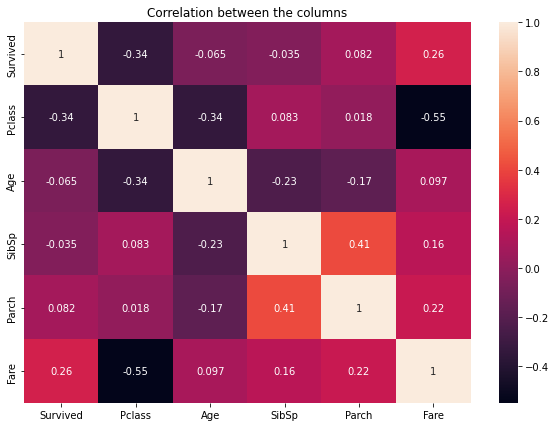

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(data1.corr(),annot=True)
plt.title('Correlation between the columns')
plt.show()

In [ ]:
#Handling outliers

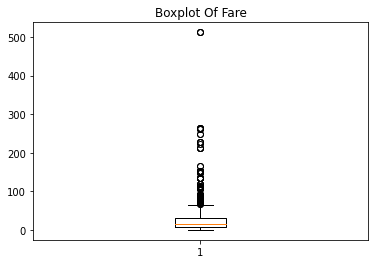

In [36]:
# Boxplot of Fare
plt.boxplot(data1['Fare'])
plt.title('Boxplot Of Fare')
plt.show()

In [37]:
Q1=np.percentile(data1['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data1['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data1['Fare'],75,interpolation='midpoint')

In [38]:
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [39]:
IQR=Q3-Q1
print(Q3-Q1)

23.0896


In [40]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [41]:
print(lower_limit)
print(upper_limit)

-26.724
65.6344


In [42]:
outlier=[]
for x in data1['Fare']:
  if((x>upper_limit) or (x<lower_limit)):
    outlier.append(x)

In [43]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [ ]:
#removing outliers

In [44]:
index_out=data1['Fare']>upper_limit

In [45]:
data1.loc[index_out].index

Int64Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
            ...
            792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
           dtype='int64', length=116)

In [ ]:
#droping outlier values

In [46]:
data1.drop(data1.loc[index_out].index,inplace=True)

In [47]:
data1.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C
10,1,3,female,4.0,1,1,16.7000,S


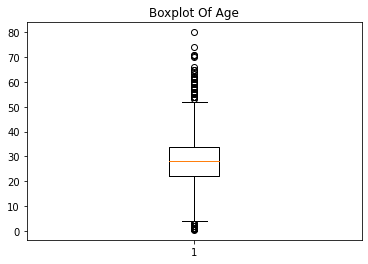

In [58]:
# Boxplot of Age
plt.boxplot(data1['Age'])
plt.title('Boxplot Of Age')
plt.show()

In [64]:
Q1=np.percentile(data1['Age'],25,interpolation='midpoint')
Q2=np.percentile(data1['Age'],50,interpolation='midpoint')
Q3=np.percentile(data1['Age'],75,interpolation='midpoint')

In [60]:
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
34.0


In [61]:
IQR=Q3-Q1
print(Q3-Q1)

12.0


In [62]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [63]:
print(lower_limit)
print(upper_limit)

4.0
52.0


In [65]:
outlier=[]
for x in data1['Fare']:
  if((x>upper_limit) or (x<lower_limit)):
    outlier.append(x)

In [66]:
outlier

[53.1,
 61.9792,
 56.4958,
 61.175,
 63.3583,
 53.1,
 61.3792,
 55.0,
 56.4958,
 0.0,
 52.5542,
 0.0,
 0.0,
 0.0,
 0.0,
 56.9292,
 57.9792,
 55.0,
 55.4417,
 0.0,
 55.9,
 0.0,
 0.0,
 56.4958,
 59.4,
 57.9792,
 55.9,
 0.0,
 56.9292,
 65.0,
 52.5542,
 0.0,
 56.4958,
 0.0,
 57.0,
 56.4958,
 53.1,
 0.0,
 53.1,
 65.0,
 57.0,
 0.0,
 53.1,
 0.0,
 0.0,
 56.4958,
 56.4958,
 52.5542]

In [ ]:
#removing outliers

In [68]:
index_out=data1['Age']>upper_limit

In [69]:
data1.loc[index_out].index

Int64Index([  6,  11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 232, 249,
            252, 280, 317, 326, 456, 467, 483, 487, 492, 493, 513, 545, 555,
            570, 571, 582, 625, 626, 630, 647, 672, 684, 694, 772, 774, 851],
           dtype='int64')

In [ ]:
#droping outlier values

In [70]:
data1.drop(data1.loc[index_out].index,inplace=True)

In [71]:
data1.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C
10,1,3,female,4.0,1,1,16.7000,S
12,0,3,male,20.0,0,0,8.0500,S


In [ ]:
#Encoding

In [75]:
data1=pd.get_dummies(data1)

In [76]:
data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
5,0,3,28.0,0,0,8.4583,0,1,0,1,0


In [ ]:
#Min Max Scaling

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
minmax = MinMaxScaler()

In [81]:
scaled_cols=['Age', 'Fare']

In [82]:
data1[scaled_cols]=minmax.fit_transform(data1[scaled_cols])

In [83]:
data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0.418379,1,0,0.111538,0,1,0,0,1
2,1,3,0.495929,0,0,0.121923,1,0,0,0,1
3,1,1,0.670415,1,0,0.816923,1,0,0,0,1
4,0,3,0.670415,0,0,0.123846,0,1,0,0,1
5,0,3,0.534703,0,0,0.130128,0,1,0,1,0


3. Create kNN and SVM models.
4. Do k-fold and stratified stratified k-fold cross validation techniques and find the average accuracy score of the models

1. KNN Model

In [84]:

x=data1.drop('Survived',axis=1)#x is the independent variables
y=data1['Survived']#y is the target variable

In [85]:

from sklearn.model_selection import train_test_split

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [87]:
from sklearn.neighbors import KNeighborsClassifier
metric_knn=[]#empty list
n_neighbors=np.arange(3,15)#k value from 3 to 14

In [88]:

from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

In [89]:
for k in n_neighbors:
 knn_clf=KNeighborsClassifier(n_neighbors=k)
 model_knn=knn_clf.fit(x_train,y_train)
 y_pred_knn=model_knn.predict(x_test)
 acc=accuracy_score(y_test,y_pred_knn)
 metric_knn.append(acc)#appending accuracy of model for each k values

In [90]:

metric_knn

[0.7010869565217391,
 0.7228260869565217,
 0.7717391304347826,
 0.75,
 0.7608695652173914,
 0.7336956521739131,
 0.7608695652173914,
 0.7445652173913043,
 0.75,
 0.7445652173913043,
 0.7608695652173914,
 0.75]

In [ ]:
#Ploting line graph of accuracy of model for each value of k

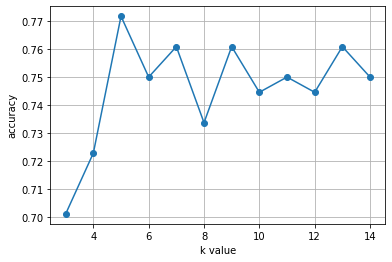

In [91]:
plt.plot(n_neighbors,metric_knn,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [ ]:
#accuracy is more for k=5,so creating model using k=5

In [92]:
knn_clf=KNeighborsClassifier(n_neighbors=5)
model_knn=knn_clf.fit(x_train,y_train)
y_pred_knn=model_knn.predict(x_test)

In [93]:
print(confusion_matrix(y_test,y_pred_knn))

[[91 18]
 [24 51]]


In [94]:
print(accuracy_score(y_test,y_pred_knn))

0.7717391304347826


In [95]:


print(precision_score(y_test,y_pred_knn))

0.7391304347826086


In [96]:
print(recall_score(y_test,y_pred_knn))

0.68


K Fold Cross Validation of KNN Model

In [97]:
from sklearn.model_selection import KFold

In [98]:
kfold_validator_knn=KFold(10,shuffle=True,random_state=42)

In [99]:
for train_index,test_index in kfold_validator_knn.split(x,y):
  print('Training Index',train_index)
  print('Testing Index',test_index)

Training Index [  0   1   2   3   4   5   6   7   8   9  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  34  35  36  37
  38  40  41  42  43  44  45  46  47  48  50  51  52  53  55  56  57  58
  59  60  61  62  64  67  68  69  70  71  73  74  75  76  79  80  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  98  99 100 101 102
 103 104 105 106 107 108 110 111 112 113 114 115 116 117 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 193 194 195 196 197
 200 201 202 203 204 205 206 207 208 209 210 213 214 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242 243 244 245 246 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 265 267 268 269

In [100]:
from sklearn.model_selection import cross_val_score

In [102]:
cv_result_knn=cross_val_score(model_knn,x,y,cv=kfold_validator_knn)

In [103]:
cv_result_knn #k fold cross validation scores

array([0.66216216, 0.85135135, 0.82432432, 0.7972973 , 0.72972973,
       0.83783784, 0.76712329, 0.7260274 , 0.7260274 , 0.76712329])

In [104]:
np.mean(cv_result_knn)

0.7689004072565716

Stratified K Fold Cross Validation of KNN Model

In [105]:
from sklearn.model_selection import StratifiedKFold

In [106]:
skfold_validator=StratifiedKFold(n_splits=10)

In [107]:
for train_index,test_index in skfold_validator.split(x,y):
  print('Training Index',train_index)
  print('Testing Index',test_index)

Training Index [ 61  65  66  68  69  71  72  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307
 308 309 310 311 312 313 314 315 316

In [108]:
skcv_result_knn=cross_val_score(model_knn,x,y,cv=skfold_validator)

In [109]:
skcv_result_knn #stratified k fold cross validation scores

array([0.78378378, 0.74324324, 0.75675676, 0.7027027 , 0.83783784,
       0.81081081, 0.82191781, 0.82191781, 0.79452055, 0.82191781])

In [110]:
np.mean(skcv_result_knn)

0.7895409107737874

2. SVM Model

In [111]:
from sklearn.svm import SVC #support vector classifier

In [112]:
svm_clf=SVC(kernel='rbf')

In [113]:
svm_model=svm_clf.fit(x_train,y_train)

In [115]:
y_pred_svm=svm_model.predict(x_test)

In [116]:
confusion_matrix(y_test,y_pred_svm)

array([[94, 15],
       [28, 47]])

In [117]:
accuracy_score(y_test,y_pred_svm)

0.7663043478260869

In [118]:
recall_score(y_test,y_pred_svm)

0.6266666666666667

In [119]:
f1_score(y_test,y_pred_svm)

0.6861313868613139

K Fold Cross Validation of SVM Model

In [120]:
kfold_validator_svm=KFold(10,shuffle=True,random_state=42)

In [121]:
for train_index,test_index in kfold_validator_svm.split(x,y):
  print('Training Index',train_index)
  print('Testing Index',test_index)

Training Index [  0   1   2   3   4   5   6   7   8   9  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  34  35  36  37
  38  40  41  42  43  44  45  46  47  48  50  51  52  53  55  56  57  58
  59  60  61  62  64  67  68  69  70  71  73  74  75  76  79  80  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  98  99 100 101 102
 103 104 105 106 107 108 110 111 112 113 114 115 116 117 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 193 194 195 196 197
 200 201 202 203 204 205 206 207 208 209 210 213 214 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242 243 244 245 246 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 265 267 268 269

In [122]:
cv_result_svm=cross_val_score(svm_model,x,y,cv=kfold_validator_svm)

In [123]:
cv_result_svm #k fold cross validation scores

array([0.71621622, 0.83783784, 0.74324324, 0.85135135, 0.81081081,
       0.82432432, 0.83561644, 0.84931507, 0.71232877, 0.75342466])

In [124]:
np.mean(cv_result_svm)

0.7934468715290632

Stratified K Fold Cross Validation of SVM Model

In [125]:
skfold_validator_svm=StratifiedKFold(n_splits=10)

In [126]:
for train_index,test_index in skfold_validator_svm.split(x,y):
  print('Training Index',train_index)
  print('Testing Index',test_index)

Training Index [ 61  65  66  68  69  71  72  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307
 308 309 310 311 312 313 314 315 316

In [127]:
skcv_result_svm=cross_val_score(svm_model,x,y,cv=skfold_validator_svm)

In [128]:
skcv_result_svm #stratified k fold cross validation scores

array([0.81081081, 0.7972973 , 0.74324324, 0.7972973 , 0.81081081,
       0.78378378, 0.80821918, 0.79452055, 0.80821918, 0.80821918])

In [129]:
np.mean(skcv_result_svm)

0.7962421325435024

Accuracy Of different models

In [131]:
print('Average K Fold Cross Validation Score Of KNN Model is:',np.mean(cv_result_knn))
print('\n')
print('Average K Fold Cross Validation Score Of SVM Model is:',np.mean(cv_result_svm))
print('\n')
print('Average Stratified Cross Validation Score OF KNN Model is:',np.mean(skcv_result_knn))
print('\n')
print('Average Stratified Cross Validation Score OF SVM Model is:',np.mean(skcv_result_svm))

Average K Fold Cross Validation Score Of KNN Model is: 0.7689004072565716


Average K Fold Cross Validation Score Of SVM Model is: 0.7934468715290632


Average Stratified Cross Validation Score OF KNN Model is: 0.7895409107737874


Average Stratified Cross Validation Score OF SVM Model is: 0.7962421325435024
